# Multinomial-Dirichlet

**문제**: 친구4명과 나는 국립공원에 놀러갔다. 해당 국립공원에는 3가지 동물만 존재하는데 호랑이, 사자 ,곰 이다. 친구들과 투어를 신청했는데 국립공원 사정상 한번에 한명씩만 투어를 할 수 있다고 한다. 어쩔수 없이 한명씩 투어를 통해 국립공원을 구경할 수 있었다. 투어가 끝나고 모여서 얘기를 하는데 각자가 본 동물들의 수가 달랐다. 나는 호랑이3 사자2 곰1을 보았는데 다른친구는 호랑이2, 사자3, 곰2를 보았다. 각자가 보았던 동물들의 수를 토대로 국립공원의 동물들의 비율에 대해서 추정하려고 한다. <br>

**가정**: 세 동물들의 출현은 모두 독립이다. <br>

**접근**: Multinomial 문제는 Dirichelt 사전 분포로 접근하기 용이하다. 두 분포의 관계는 Binomial-Beta 분포의 관계와 같다.다만 선택지가 2개에서 n개로 확장된 차이이다. 생소한 분포일 수 있지만 분포의 특징 작동원리 모두 Binomial-Beta와 동일하다. 

In [0]:
import pymc3 as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')

In [0]:
species = ['tigers','lions', 'bears']
# 관측값
c = np.array([[3, 2, 1],
             [2, 3, 1],
             [2, 2, 2],
             [2, 3, 2],
             [4, 2, 2]])

# 총 관측동물
n = np.array([6,6,6,7,8])

# 사전확률
alphas = np.array([1, 1, 1])

# 기대값
expected = (alphas + c[0]) / (c[0].sum() + alphas.sum())

# 분산
variance = (alphas*(alphas.sum()-alphas))/((alphas.sum()**2)*(alphas.sum()+1))

In [5]:
with pm.Model() as model:
    
    p = pm.Dirichlet('p', a=alphas, shape=3)
    y_obs = pm.Multinomial('y_obs', n=n, p=p, shape=3, observed=c)   

/usr/local/lib/python3.6/dist-packages/theano/tensor/subtensor.py:2197: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


In [6]:
with model:
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [p]
100%|██████████| 2000/2000 [00:01<00:00, 1205.59it/s]


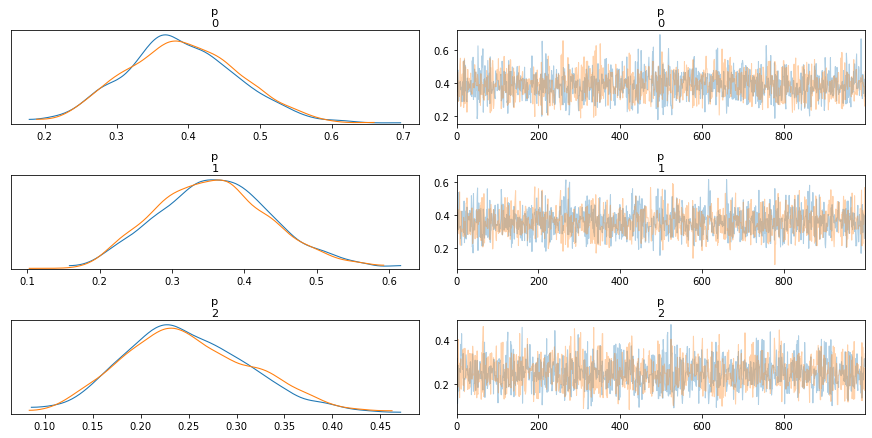

In [14]:
az.plot_trace(trace)
plt.show()

In [16]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p__0,0.391199,0.079524,0.001789,0.241923,0.545769,2048.168392,0.999850
p__1,0.359346,0.078599,0.001853,0.206144,0.507587,1881.727763,1.000936
p__2,0.249455,0.066714,0.001375,0.124984,0.381111,2076.038132,0.999999
